## Практична робота 6

### Завдання 2

Визначення важливих ознак. Завдання полягає в тому, щоб з використанням алгоритмів SVM  і  Random Forest  визначити  важливі ознаки в наборі даних. Необхідно передбачити, чи має пацієнт рак грудей або ні на основі ознак. Використати датасет "Breast Cancer" (рак грудей) з бібліотеки scikit-learn для визначення важливих ознак.  

Завдання включає наступні кроки:

1. Завантажити набір даних.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

2. Розділити дані на тренувальний та тестовий набори.

In [ ]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Застосувати SVM і Random Forest для визначення важливих ознак.

In [ ]:
svm_cl = SVC(kernel='linear')
svm_cl.fit(X_train, y_train)

rf_cl = RandomForestClassifier(random_state=42)
rf_cl.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

4. Побудувати графік або таблицю, щоб показати важливість кожної ознаки в аналізі.

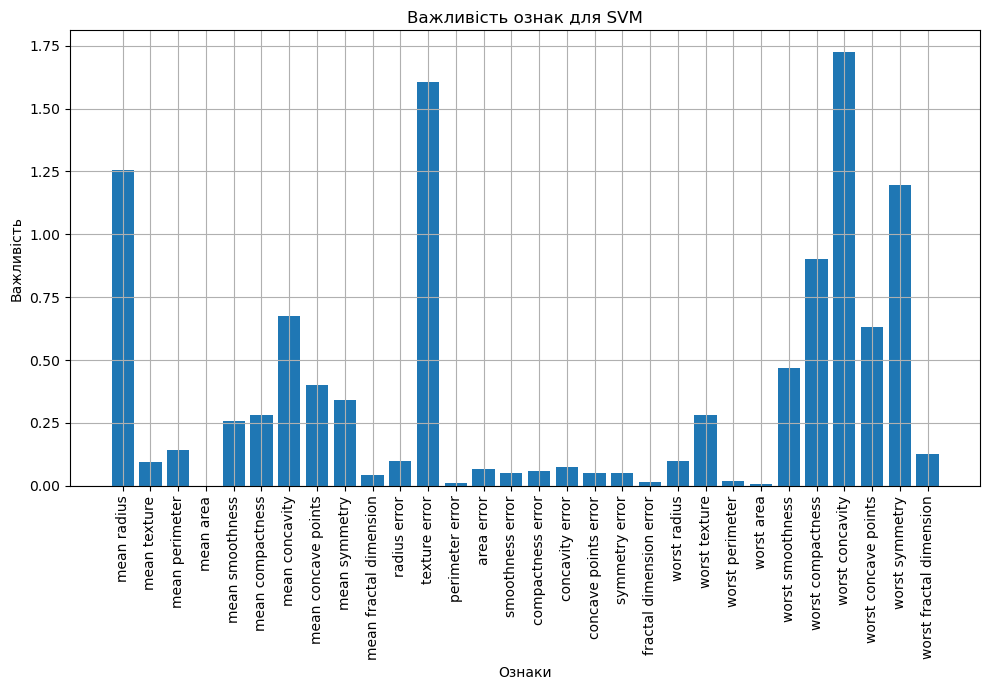

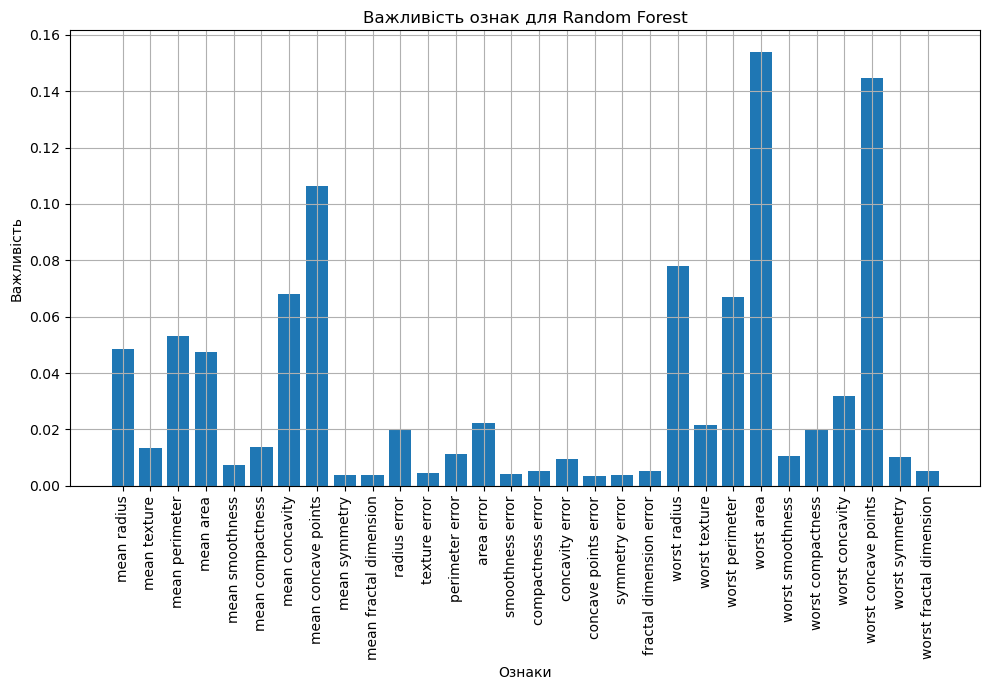

In [ ]:
# Отримання важливості ознак
svm_importance = np.abs(svm_cl.coef_[0])
rf_importance = rf_cl.feature_importances_

# Побудова графіку важливості ознак для SVM
plt.figure(figsize=(10, 7))
plt.bar(range(X_train.shape[1]), svm_importance, align="center")
plt.xticks(range(X_train.shape[1]), cancer.feature_names, rotation=90)
plt.title("Важливість ознак для SVM")
plt.xlabel("Ознаки")
plt.ylabel("Важливість")
plt.tight_layout()
plt.grid()
plt.show()

# Побудова графіку важливості ознак для Random Forest
plt.figure(figsize=(10, 7))
plt.bar(range(X_train.shape[1]), rf_importance, align="center")
plt.xticks(range(X_train.shape[1]), cancer.feature_names, rotation=90)
plt.title("Важливість ознак для Random Forest")
plt.xlabel("Ознаки")
plt.ylabel("Важливість")
plt.tight_layout()
plt.grid()
plt.show()

5. Обговорити результати та визначити, які ознаки найбільше впливають на вихідні дані.

In [ ]:
svm_sort = np.argsort(svm_importance)[::-1]
rf_sort = np.argsort(rf_importance)[::-1]
svm_influential = cancer.feature_names[svm_sort][:5]
rf_influential= cancer.feature_names[rf_sort][:5]

print("Ознаки SVM, які найбільше впливають на вихідні дані:", svm_influential)
print("Ознаки Random Forest, які найбільше впливають на вихідні дані:", rf_influential)

Ознаки SVM, які найбільше впливають на вихідні дані: ['worst concavity' 'texture error' 'mean radius' 'worst symmetry'
 'worst compactness']
Ознаки Random Forest, які найбільше впливають на вихідні дані: ['worst area' 'worst concave points' 'mean concave points' 'worst radius'
 'mean concavity']


6. Обчислити точність для двох алгоритмів і порівняти результати

In [ ]:
svm_pred = svm_cl.predict(X_test)
rf_pred = rf_cl.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Точність SVM: ", svm_accuracy)
print("Точність Random Forest: ", rf_accuracy)

if svm_accuracy > rf_accuracy:
    print("Алгоритм SVM ефективніший за Random Forest на", svm_accuracy - rf_accuracy)
elif svm_accuracy < rf_accuracy:
    print("Алгоритм Random Forest ефективніший за SVM на", rf_accuracy - svm_accuracy)
else:
    print("Обидва алгоритма мають однакову точність")

Точність SVM:  0.956140350877193
Точність Random Forest:  0.9649122807017544
Алгоритм Random Forest ефективніший за SVM на 0.00877192982456143
